## AIDM7330 Exploratory Data Visualization Individual Assignment
Name: CHEN Cang

Student ID: 20439369

In [95]:
#Installation package
import sys
!{sys.executable} -m pip install pandas

In [96]:
%matplotlib inline

In [97]:
import pandas as pd 
import numpy as np

## Data process

We put the data that we need in list according to the columns or rows by python, then we can combine the lists to a new data frame directly.
At first, we read the csv by pandas in python, then we put every column in list so that we can extract the data that we need to a new data frame.

1.First, read the data in csv format
2.Observe the attributes and dimensions of the data we have to determine whether we can use. 
3.Select what we need in the data and create a new data frame
4.Perform a preliminary analysis of the quantitative data and find out whether the possible problems are consistent with the problems we raised
5.After observing the data, according to the questions we asked, select the appropriate variables, create a new table, and then use python to visualize the data.
6.Our data is designed with multiple tables, so we repeat the above actions in data processing, and perform operations of merging tables and transposing
We also crawled some data and read it as a data frame for analysis and visualization together with other data.


## 1.crawled some data and read it as a data frame for analysis and visualization together with other data.

In [208]:
#We also crawled some data and read it as a data frame for analysis and visualization together with other data
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [209]:
url = 'https://www.tutorcircle.hk/blog/6475/2020-%E9%A6%99%E6%B8%AF-band1-%E4%B8%AD%E5%AD%B8-%E6%9C%80%E6%96%B0-%E6%8E%92%E5%90%8D-top100/'
re = requests.get(url)
soup = BeautifulSoup(re.text,'html.parser')
re.encoding = 'utf-8'
print(soup)

<!DOCTYPE html>
<html lang="en-US" prefix="og: http://ogp.me/ns#" xmlns:addthis="https://www.addthis.com/help/api-spec" xmlns:fb="https://www.facebook.com/2008/fbml"><head><link href="https://www.tutorcircle.hk/blog/wp-content/cache/minify/ccab3.css" media="all" rel="stylesheet" type="text/css"/><meta charset="utf-8"/><meta content="width=device-width, initial-scale=1" name="viewport"/><title>(免費20-21升中派位指南*)【全港中學排名】2020最新 TOP100 內附名校詳細分析 尋補・Blog</title> <script>!function(f,b,e,v,n,t,s){if(f.fbq)return;n=f.fbq=function(){n.callMethod?n.callMethod.apply(n,arguments):n.queue.push(arguments)};if(!f._fbq)f._fbq=n;n.push=n;n.loaded=!0;n.version='2.0';n.queue=[];t=b.createElement(e);t.async=!0;t.src=v;s=b.getElementsByTagName(e)[0];s.parentNode.insertBefore(t,s)}(window,document,'script','https://connect.facebook.net/en_US/fbevents.js');fbq('init','1475152062764543');fbq('track','PageView');</script> <noscript><img height="1" src="https://www.facebook.com/tr?id=1475152062764543&amp;ev=PageVi

In [210]:
table = soup.find ('table',attrs={'id':'tablepress-15'})
results = table.find_all('tr')
print('Number of results',len(results))
print(results)

Number of results 101
[<tr class="row-1 odd"><th class="column-1">排名</th><th class="column-2">學校</th><th class="column-3">DSE成績排名</th><th class="column-4">DSE換算分數（70%）</th><th class="column-5">班師比例（ 15%）</th><th class="column-6">師資（ 1 0 %）</th><th class="column-7">教學語言</th><th class="column-8"> </th><th class="column-9">類別</th><th class="column-10">總分（ 95 ）</th></tr>, <tr class="row-2 even"><td class="column-1">1</td><td class="column-2">聖保羅男女中學St. Paul's Co-educational College</td><td class="column-3">1</td><td class="column-4">70</td><td class="column-5">13.85</td><td class="column-6">5.87</td><td class="column-7">英文</td><td class="column-8">男女校</td><td class="column-9">直資</td><td class="column-10">89.72</td></tr>, <tr class="row-3 odd"><td class="column-1">2</td><td class="column-2">拔萃女書院Diocesan Girls' School</td><td class="column-3">2</td><td class="column-4">69.84</td><td class="column-5">12.878</td><td class="column-6">6.11</td><td class="column-7">英文</td><td class="column-8">女校

In [211]:
排名 = [r.text for r in table.find_all(class_= "column-1")]
學校 = [s.text for s in table.find_all(class_= "column-2")]
DSE成績排名 = [d.text for d in table.find_all(class_= "column-3")]
DSE換算分數 = [s.text for s in table.find_all(class_="column-5")]
班師比例 = [b.text for b in table.find_all(class_="column-6")]
師資 = [t.text for t in table.find_all(class_="column-7")]
教學語言 = [l.text for l in table.find_all(class_="column-8")]
類別 = [c.text for c in table.find_all(class_='column-9')]
總分 = [o.text for o in table.find_all(class_="column-10")]

In [212]:
df = pd.DataFrame.from_dict({'Rank':排名,
                            'School':學校,
                            'DSE Rank':DSE成績排名,
                            'DSE conversion score（70%）':DSE換算分數,
                            'Class teacher ratio (15%)':班師比例,
                            'Teachers (10%)':師資,
                            'Teaching language':教學語言,
                            'Class':類別,
                            'Score（95）':總分,
                             })

In [213]:
df

,Rank,School,DSE Rank,DSE conversion score（70%）,Class teacher ratio (15%),Teachers (10%),Teaching language,Class,Score（95）
0,排名,學校,DSE成績排名,班師比例（ 15%）,師資（ 1 0 %）,教學語言,,類別,總分（ 95 ）
1,1,聖保羅男女中學St. Paul's Co-educational College,1,13.85,5.87,英文,男女校,直資,89.72
2,2,拔萃女書院Diocesan Girls' School,2,12.878,6.11,英文,女校,直資,88.82
3,3,協恩中學Heep Yunn School,10.5,11.63,5.75,英文,女校,直資,85.88
4,4,拔萃男書院Diocesan Boys' School,33,14.791,5.53,英文,男校,直資,85.29
...,...,...,...,...,...,...,...,...,...
96,96,景嶺書院 King Ling College,94,8.43,6.665,英文,男女校,資助,70.50
97,97,播道書院 Evangel College,100.5,10.5,5.48,英文,男女校,直資,70.36
98,98,沙田循道衞理中學 Sha Tin Methodist College,92,8.75,5.705,英文,男女校,資助,70.17
99,99,趙聿修紀念中學 Chiu Lut Sau Memorial Secondary School,95.5,8.28,6.035,英文,男女校,官立,69.48


## 2.First, read the data in csv format

In [98]:

ssp = pd.read_csv('../data/' + 'ssp_2019_2020_en.csv')

In [99]:
#Observe the attributes and dimensions of the data we have to determine whether we can use
print(type(ssp))
ssp.head(5)

<class 'pandas.core.frame.DataFrame'>


,district,school_name,address,tel,fax,email,website,school_mission,name_supervisor,title_supervisor,...,hscse_school_ethos,fdev_development_url,fdev_school_dev_plan,fdev_teacher_pro_training_and_dev,fdev_life_wide_learning_activities,sf_school_facilities,sf_facility_for_special_educational_needs,fdev_others,fdev_direct_public_transportation_to_school,other_districts
0,Kowloon City,Diocesan Boys' School,131 Argyle Street Kowloon,27115191,27611026,dbsadmin@dbs.edu.hk,http://www.dbs.edu.hk,To provide a liberal education based on Christian principles.<br>(https://www.dbs.edu.hk/index.php?s=profile&m=schoolmission),Paul Kwong,The Most Revd Dr.,...,"The school strongly encourages students to join different types of activities. Students are encouraged to make use of the school’s rich resources to develop personal’s interests, broaden their horizons and to explore the outside world. It is the school’s goal to cultivate outgoing, positive and optimistic students who treasure friendship and be able to think laterally. There are two registered Social Workers stationed at the school to counsel students in need.",https://www.dbs.edu.hk/index.php?s=profile&m=plansreports,"The school provides a holistic education based on multiple intelligence. We aim at helping students develop their creativity, leadership and independent thinking.","The school provides in-service Professional Development Programmes for teachers. Teachers are positively encouraged to join different workshops, seminars and professional development courses.","The school has got more than 60 clubs and societies, school teams and student organizations to help students in organizing different activities. The school encourages students to make use of her rich resources to develop their personal interests and train their organization skills. Through joining inter-school competitions, students will exercise team spirit.",DBS facilities include:<br>- Track and field<br>- Swimming pools<br>- Tennis courts<br>- Basketball courts<br>- Gymnasium<br>- 3 Multi-media learning centres<br>- 13 special rooms<br>- Library<br>- Auditorium<br>- School Hall (big enough to screen movies),Accessible toilet.,"The School has set up a fund based on education development. It offers different types of scholarships, school fees remission and extra-curricular activities allowances in order to cater to different students’ needs.","Bus: 1, 1A, 2A, 2X, 3C, 9, 12A, 13D, 13P, 16, 16X, 18, 24, 27, 41, 42, 45, 72X, 81S, 87, 87D, 95, 98C, 98S, 203E, 213D, 281A, 296C, 296P, 887;<br>MTR: Mongkok / Mongkok East Station.",NaN
1,Yau Tsim Mong,Diocesan Girls' School,"1 Jordan Road, Kowloon",22779100,27807149,info@dgs.edu.hk,http://www.dgs.edu.hk,"Building on a legacy of distinction, it is our mission to serve as a model for effective teaching and learning in a dynamic educational environment where students achieve their maximum potential and gain love of lifelong learning; and teachers excel in pedagogy, stimulating young minds and encouraging them to extend excellence beyond the classroom.<br>We provide each and every student with an ideal environment to grow and excel from the time she begins her education journey with us. We pledge to do the utmost to offer our students a vibrant, enjoyable education opportunity that equips them for lifelong challenges.","Doris Ho, JP",Mrs.,...,"We help students build moral values based on Christian principles and stress the need for respect, modesty and self-discipline. Support for students is abundantly provided through different school schemes.",http://www.dgs.edu.hk/display.php?section=Home&page=School_Plans,The three areas of concern for 2018/19 - 2020/21 are: <br>Updating students' knowledge on current issues;<br>Holistic provision of students' emotional support; and<br>Establishment of Boarding House.,The Staff Development Team makes yearly plans for the professional development of teachers to heighten their teaching effectiveness and apply the different strategies shared by 

In [100]:
ssp.shape #Determine the amount of data

(446, 101)

In [101]:
ssp.columns#Observe the data

Index(['district', 'school_name', 'address', 'tel', 'fax', 'email', 'website',
       'school_mission', 'name_supervisor', 'title_supervisor',
       ...
       'hscse_school_ethos', 'fdev_development_url', 'fdev_school_dev_plan',
       'fdev_teacher_pro_training_and_dev',
       'fdev_life_wide_learning_activities', 'sf_school_facilities',
       'sf_facility_for_special_educational_needs', 'fdev_others',
       'fdev_direct_public_transportation_to_school', 'other_districts'],
      dtype='object', length=101)

In [102]:
ssp.index#Observe the data

RangeIndex(start=0, stop=446, step=1)

In [103]:
ssp.info()#Observe the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Columns: 101 entries, district to other_districts
dtypes: float64(2), int64(17), object(82)
memory usage: 352.0+ KB


In [104]:
ssp.describe() #Observe the data

,tel,fax,school_size,commencement_of_operation_year,tsi_no_of_teachers,tsi_percent_of_certificate,tsi_percent_of_bachelor,tsi_percent_of_master_or_above,tsi_percent_of_special_edu,tsi_work_exp_0_4,tsi_work_exp_5_9,tsi_work_exp_10_or_above,current_year_no_of_class_s1,current_year_no_of_class_s2,current_year_no_of_class_s3,current_year_no_of_class_s4,current_year_no_of_class_s5,current_year_no_of_class_s6,scha_support_for_non_chinese
count,4.460000e+02,4.460000e+02,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,0.0
mean,2.571381e+07,2.578249e+07,7439.987668,1971.538117,60.156951,96.311659,90.932735,51.286996,28.394619,15.284753,13.591928,71.123318,3.968610,3.932735,3.865471,3.905830,3.930493,3.970852,NaN
std,3.416584e+06,2.019949e+06,9070.068990,28.234764,14.264674,8.257333,19.274363,10.655300,12.739970,10.050305,7.074520,13.425803,0.789767,0.829217,0.826429,0.832007,0.788749,0.771138,NaN
min,2.109100e+07,2.109112e+07,1000.000000,1818.000000,8.000000,1.000000,29.000000,14.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2.424268e+07,2.440990e+07,4902.500000,1963.000000,54.250000,95.250000,98.000000,44.000000,20.000000,8.000000,9.000000,64.250000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,NaN
50%,2.552551e+07,2.575954e+07,6000.000000,1977.000000,59.000000,98.000000,100.000000,51.000000,28.000000,13.000000,13.000000,73.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,NaN
75%,2.676661e+07,2.706847e+07,7695.750000,1988.000000,64.000000,100.000000,100.000000,58.000000,35.000000,20.750000,17.000000,81.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,NaN
max,8.208209e+07,3.655331e+07,150000.000000,2010.000000,166.000000,100.000000,100.000000,93.000000,88.000000,66.000000,50.000000,97.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,NaN


## 3.Select what we need in the data and create a new data frame

In [105]:

ssp[['district', 'school_name','school_type','school_size','commencement_of_operation_year','tsi_no_of_teachers','tsi_percent_of_certificate','tsi_percent_of_bachelor','tsi_percent_of_master_or_above','tsi_work_exp_0_4','tsi_work_exp_5_9','tsi_work_exp_10_or_above','current_year_no_of_class_s1','current_year_no_of_class_s2','current_year_no_of_class_s3','current_year_no_of_class_s4','current_year_no_of_class_s5','current_year_no_of_class_s6','hscse_school_ethos']].head(30)

,district,school_name,school_type,school_size,commencement_of_operation_year,tsi_no_of_teachers,tsi_percent_of_certificate,tsi_percent_of_bachelor,tsi_percent_of_master_or_above,tsi_work_exp_0_4,tsi_work_exp_5_9,tsi_work_exp_10_or_above,current_year_no_of_class_s1,current_year_no_of_class_s2,current_year_no_of_class_s3,current_year_no_of_class_s4,current_year_no_of_class_s5,current_year_no_of_class_s6,hscse_school_ethos
0,Kowloon City,Diocesan Boys' School,DSS,50000.0,1869,142,96,100,50,34,17,49,6,6,6,6,6,6,"The school strongly encourages students to join different types of activities. Students are encouraged to make use of the school’s rich resources to develop personal’s interests, broaden their horizons and to explore the outside world. It is the school’s goal to cultivate outgoing, positive and optimistic students who treasure friendship and be able to think laterally. There are two registered Social Workers stationed at the school to counsel students in need."
1,Yau Tsim Mong,Diocesan Girls' School,DSS,13088.0,1860,103,97,97,63,8,27,65,5,5,5,5,5,5,"We help students build moral values based on Christian principles and stress the need for respect, modesty and self-discipline. Support for students is abundantly provided through different school schemes."
2,Kwai Tsing,Po Leung Kuk Lo Kit Sing (1983) College,Aided,6500.0,1984,55,100,100,42,12,15,73,4,4,4,4,4,4,"Our school adopts a whole-school approach to discipline and guidance. Students in general behave well with good self discipline. School prefects and guidance prefects help to maintain a good and healthy learning environment. We have a fair and consistent discipline policy, with rules clearly spelt out and made known to all staffs and students."
3,Tuen Mun,Po Leung Kuk Centenary Li Shiu Chung Memorial College,Aided,5000.0,1978,53,98,100,47,13,6,81,4,4,4,4,4,4,"The school values decency and self discipline in children. To support students' balanced growth, various services are provided such as guidance services, teacher counselors and social workers, group counseling, career guidance, Big Brothers and Sisters Scheme and the Mentorship Scheme."
4,Wong Tai Sin,Po Leung Kuk No.1 W.H. Cheung College,Aided,5000.0,1971,63,98,100,54,14,6,80,5,5,5,5,5,5,"Our school stresses the inculcation of moral virtues and the development of personality. The Guidance Committee and social worker play the role of caring about and guiding the development of individual student's character development and personal interest, and helping them handle emotional problems."
5,Tuen Mun,Po Leung Kuk Tang Yuk Tien College,Aided,4000.0,1987,58,98,100,48,12,19,69,4,4,4,4,4,4,"Our students are humble, diligent and well-behaved. The student-teacher relationship is harmonious and all students have a strong sense of belonging to the school. Support is given to students by guidance teachers, the school social worker and educational psychologist. Moreover, ""Big Brothers and Sisters Scheme"", ""Form Teacher Guidance Scheme"", Sex Education, Life Education activities, Adventure activities and other preventive programmes are also organized to facilitate the personality development of students."
6,Wong Tai Sin,Po Leung Kuk Celine Ho Yam Tong College,Aided,7000.0,2001,64,98,100,59,17,25,58,5,5,5,5,5,5,"To enhance students’ ethics, build up their positive values and develop positive attitudes towards cyber world, Discipline Committee, Guidance Committee, Student Affairs Committee and Civic and Moral Education Committee organized various educational programmes with different themes included, such as positive education, life education, cyber-bullying, online defamation, illegal uploading and downloading of pictures or information, online thefts and hacking activities etc. Various activities were held, such as news discussion, video clip broadcast, slogan design competition, online monitoring campaign, talks or workshops so as to let students understand the importance of positive thinking and criminal responsibility of co

## 4.Perform a preliminary analysis of the quantitative data and find out whether the possible problems are consistent with the problems we raised

In [106]:

ssp.describe().loc[['mean','std','min','25%','50%','75%','max'],['school_size','commencement_of_operation_year','tsi_no_of_teachers','tsi_percent_of_certificate','tsi_percent_of_bachelor','tsi_percent_of_master_or_above','tsi_work_exp_0_4','tsi_work_exp_5_9','tsi_work_exp_10_or_above','current_year_no_of_class_s1','current_year_no_of_class_s2','current_year_no_of_class_s3','current_year_no_of_class_s4','current_year_no_of_class_s5','current_year_no_of_class_s6']]

,school_size,commencement_of_operation_year,tsi_no_of_teachers,tsi_percent_of_certificate,tsi_percent_of_bachelor,tsi_percent_of_master_or_above,tsi_work_exp_0_4,tsi_work_exp_5_9,tsi_work_exp_10_or_above,current_year_no_of_class_s1,current_year_no_of_class_s2,current_year_no_of_class_s3,current_year_no_of_class_s4,current_year_no_of_class_s5,current_year_no_of_class_s6
mean,7439.987668,1971.538117,60.156951,96.311659,90.932735,51.286996,15.284753,13.591928,71.123318,3.968610,3.932735,3.865471,3.905830,3.930493,3.970852
std,9070.068990,28.234764,14.264674,8.257333,19.274363,10.655300,10.050305,7.074520,13.425803,0.789767,0.829217,0.826429,0.832007,0.788749,0.771138
min,1000.000000,1818.000000,8.000000,1.000000,29.000000,14.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4902.500000,1963.000000,54.250000,95.250000,98.000000,44.000000,8.000000,9.000000,64.250000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
50%,6000.000000,1977.000000,59.000000,98.000000,100.000000,51.000000,13.000000,13.000000,73.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,7695.750000,1988.000000,64.000000,100.000000,100.000000,58.000000,20.750000,17.000000,81.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,150000.000000,2010.000000,166.000000,100.000000,100.000000,93.000000,66.000000,50.000000,97.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


## 5.After observing the data, according to the questions we asked, select the appropriate variables, create a new table, and then use python to visualize the data


## Results02-- Teacher education and qualifications
To observe the qualifications of teachers by schools,
we select 3 columns of data to analyze:
‘percent_of_certificate’, ‘percent_of_bachelor’ and ‘percent_of_master_or_above’.
By visualizing these in histograms, it is clearly to see the comparison among different qualifications of teachers. 
In this chart, we could tell that most of the teaching team is mostly consist of bachelor. And most of the teachers have the certificate. About 60 schools have nearly half of the teachers got master’s degree.  Less than 10 schools own 75% of the teachers as master.


In [107]:
from pandas import *

In [108]:

#Our data is designed with multiple tables, so we repeat the above actions in data processing, and perform operations of merging tables and transposing
table1 = pivot_table(ssp, values='tsi_no_of_teachers', index=['school_name'], columns=['district'], aggfunc=np.mean)
table1.head()

district,Central & Western,Eastern,Islands,Kowloon City,Kwai Tsing,Kwun Tong,North,Sai Kung,Sha Tin,Sham Shui Po,Southern,Tai Po,Tsuen Wan,Tuen Mun,Wan Chai,Wong Tai Sin,Yau Tsim Mong,Yuen Long
school_name,,,,,,,,,,,,,,,,,,
CCC Kei Yuen College,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.0
Tsung Tsin Christian Academy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AD&FD POHL Leung Sing Tak College,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN
Aberdeen Baptist Lui Ming Choi College,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aberdeen Technical School,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

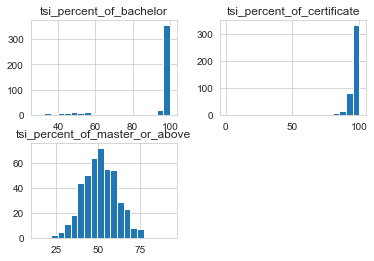

In [110]:
ssp[['tsi_percent_of_certificate','tsi_percent_of_bachelor','tsi_percent_of_master_or_above']].hist(bins = 20)
plt.show()

In [111]:
ssp_district = ssp.loc[ssp['district'].isin(['Central & Western','Eastern','Islands','Kowloon City','Kwai Tsing','Kwun Tong','North','Sai Kung','Sha Tin','Sham Shui Po','Southern','Tai Po','Tsuen Wan','Tuen Mun','Wan Chai','Wong Tai Sin','Yau Tsim Mong','Yuen Long'])]

In [112]:
ssp_district_pivot =ssp_district.pivot_table(values = 'tsi_no_of_teachers', columns = 'district', index = 'school_name')

In [113]:
ssp_district_pivot

district,Central & Western,Eastern,Islands,Kowloon City,Kwai Tsing,Kwun Tong,North,Sai Kung,Sha Tin,Sham Shui Po,Southern,Tai Po,Tsuen Wan,Tuen Mun,Wan Chai,Wong Tai Sin,Yuen Long
school_name,,,,,,,,,,,,,,,,,
CCC Kei Yuen College,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.0
Tsung Tsin Christian Academy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AD&FD POHL Leung Sing Tak College,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN
Aberdeen Baptist Lui Ming Choi College,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN
Aberdeen Technical School,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yu Chun Keung Memorial College,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yu Chun Keung Memorial College No. 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN
Yuen Long Catholic Secondary School,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.0


## ## Results02-Teacher resources-No.of teachers
We load the spreadsheet of 'ssp_2019_2020_en.csv', which contain multiple information of all the high schools. We want to know the distribution of quantity of teachers among schools by district.
We select the column of 'tsi_no_of_teachers' as the new values, set the 'district' as new columns, set ‘school_name’ as index. 
Each value in coloumn ‘school_name’ match its ‘no_of_teachers’, and a district own a number of different schools. This is the reason why we choose these data to solve the question.
We visualized the result in histogram format then we got this chart.

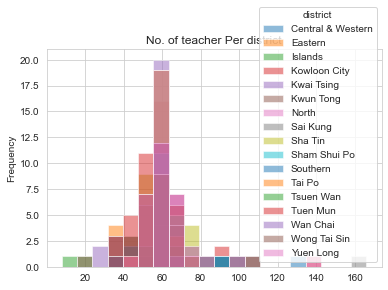

In [114]:

ssp_district_pivot = ssp_district.pivot_table(values = 'tsi_no_of_teachers', columns = 'district', index = 'school_name')
ssp_district_pivot.plot(kind = 'hist', alpha=0.5, bins = 20, title = 'No. of teacher Per district')
plt.show()



## It is clearly to see that the majority of high schools have 50 – 70 teachers.  Nearly 20 schools in some districts including Kwai Tsing have about 60 teachers.  One school in Sai Kung have highest number of teachers, which is about 160. One school in Tsuen Wan only have less than 20 teachers.

In [116]:
district = ssp.groupby('district').size()
district

district
Central & Western    11
Eastern              30
Islands              10
Kowloon City         35
Kwai Tsing           31
Kwun Tong            33
North                20
Sai Kung             26
Sha Tin              43
Sham Shui Po         26
Southern             15
Tai Po               20
Tsuen Wan            13
Tuen Mun             37
Wan Chai             17
Wong Tai Sin         23
Yau Tsim  Mong       17
Yuen Long            39
dtype: int64

In [117]:
district.index

Index(['Central & Western', 'Eastern', 'Islands', 'Kowloon City', 'Kwai Tsing',
       'Kwun Tong', 'North', 'Sai Kung', 'Sha Tin', 'Sham Shui Po', 'Southern',
       'Tai Po', 'Tsuen Wan', 'Tuen Mun', 'Wan Chai', 'Wong Tai Sin',
       'Yau Tsim  Mong', 'Yuen Long'],
      dtype='object', name='district')

## Results01–infrastructure--School area and No. of teachers
To observe the qualifications of teachers by schools,
‘percent_of_certificate’, ‘percent_of_bachelor’ and ‘percent_of_master_or_above’.
By visualizing these in histograms, it is clearly to see the comparison among different qualifications of teachers. 
In this chart, we could tell that most of the teaching team is mostly consist of bachelor. And most of the teachers have the certificate.About 60 schools have nearly half of the teachers got master’s degree. Less than 10 schools own 75% of the teachers as master.

In [188]:
summarized_df = ssp.groupby(by = 'district')[['tsi_no_of_teachers', 'school_size']].mean()
summarized_df

,tsi_no_of_teachers,school_size
district,,
Central & Western,70.636364,7682.000000
Eastern,54.400000,6339.066667
Islands,51.800000,9467.200000
Kowloon City,65.085714,8498.400000
Kwai Tsing,57.935484,6271.838710
Kwun Tong,61.575758,6462.454545
North,62.500000,12518.850000
Sai Kung,64.346154,7524.423077
Sha Tin,61.488372,6994.674419


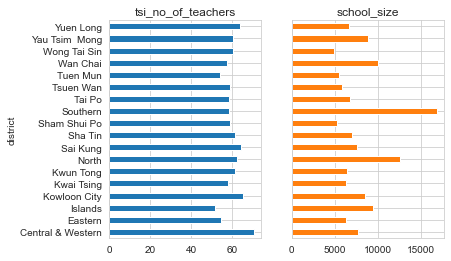

In [189]:


summarized_df.plot(kind = 'barh', subplots = True, layout = (1, 2), sharex = False, sharey = True, legend = False)
plt.show()


## Results04–School missions & Ethos
According to the 
hscse_school_ethos, 
we Create and generate a word cloud image by python.
According to the school_mission, we Create and generate a word cloud image by python

In [201]:

import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', None)

In [202]:
import sys
!{sys.executable} -m pip install wordcloud

In [203]:
from wordcloud import WordCloud, ImageColorGenerator

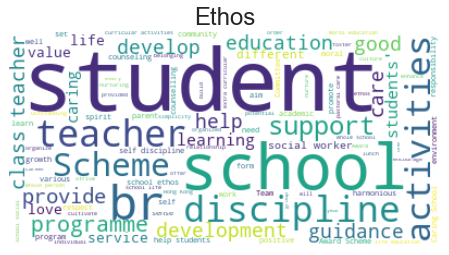

In [132]:


ethos = ' '.join(text for text in ssp['hscse_school_ethos'])
wordcloud = WordCloud(background_color="white").generate(ethos)
plt.figure(figsize=(8,4))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Ethos',size=24)
plt.show()

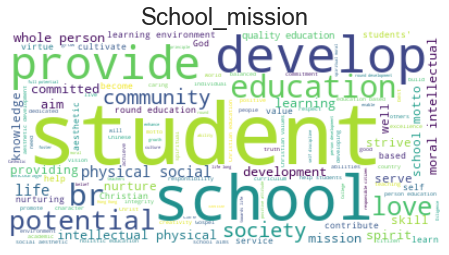

In [205]:
mission = ' '.join(text for text in ssp['school_mission'])

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white").generate(mission)
# Display the generated image:
plt.figure(figsize=(8,4))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('School_mission',size=24)
plt.show()

In [163]:
st = pd.read_csv('../data/' + 'stutea1.csv')

## Results03-- Types of funding and number of teachers
We choose two variables, the type of subsidy and the number of teachers, to create a table. 
Because of the relationship between the type and the number, we choose a scatter diagram to present it. It can be seen that the scale of DSS type middle schools is more flexible.

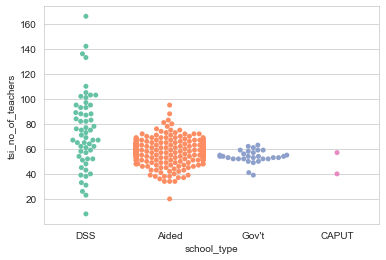

In [136]:

sspCopy = ssp.copy()
medianAge = sspCopy['tsi_no_of_teachers'].median()
sspCopy.fillna({'tsi_no_of_teachers': medianAge}, inplace=True)
sns.swarmplot(x="school_type", y="tsi_no_of_teachers", data=sspCopy, palette='Set2');

## Results02-- Teacher-student ratio
Select the number variables of students and teachers in each district to compare, and observe whether there are significant differences

In [190]:

summarized_df4 =  st.groupby(by = 'District')[['All Grades', 'no_teachers']].mean()
summarized_df4

,All Grades,no_teachers
District,,
Central & Western,10671,777
Eastern,20434,1632
Islands,6101,518
Kowloon City,30271,2278
Kwai Tsing,20401,1796
Kwun Tong,25393,2032
North,16128,1250
Sai Kung,17736,1673
Sha Tin,32147,2644


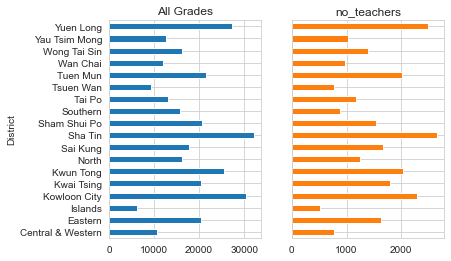

In [184]:
summarized_df4.plot(kind = 'barh', subplots = True, layout = (1, 2), sharex = False, sharey = True, legend = False)
plt.show()

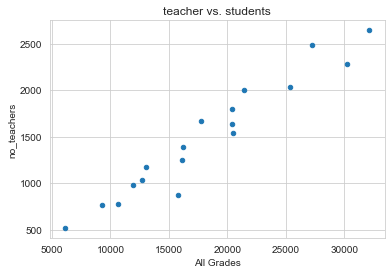

In [179]:
#Also use the scatter plot to observe whether the number of teachers and the number of students match overall
st.plot(kind = 'scatter', x = 'All Grades', y = 'no_teachers', title = 'teacher vs. students')
plt.show()

In [167]:
gov = pd.read_csv('../data/' + 'gov-expenditure.csv')
gov

,Description,Total expenditure on education (HK$ million),Total expenditure on education - As percentage of total government expenditure (%),Total expenditure on education - As percentage of Gross Domestic Product (GDP) (%),Recurrent expenditure on education (HK$ million),Recurrent expenditure on education - Spent on Primary education (%),Recurrent expenditure on education - Spent on Secondary education (%),Recurrent expenditure on education - Spent on Post-secondary education (%),Recurrent expenditure on education - Spent on Others (%)
0,FY2017/18,88465,18.8,3.3,80233,22.8,33.2,26.9,17.1
1,FY2018/19,108035,20.3,3.8,85528,23.3,32.6,26.4,17.7
2,FY2019/20 (Revised Estimates),125861,20.6,4.4,92384,24.4,32.4,25.9,17.3


In [144]:
!pip install joypy
import joypy

## Results03-- Types of funding and Score
Depend on “2020 ranking of TOP100 schools in Hong Kong”, we choose ‘class’ and ‘Score (95)’ as variable in order to explore the relationship between funding types school rankings.
Figure 8 reflects aimed secondary schools do better in the rankings.

In [198]:


summarized_df7 = rank.groupby(by = 'Class')['Score（95）'].mean()
summarized_df7

Class
Aided    79.876667
CAPUT    75.400000
DSS      76.979189
Gov't    77.062857
Name: Score（95）, dtype: float64

/Users/chencang/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/chencang/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65289 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/chencang/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 65288 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/chencang/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 65289 missing from current font.
  font.set_text(s, 0, flags=flags)


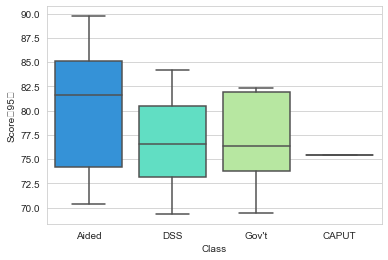

In [200]:
sns.boxplot(x="Class", y="Score（95）", data=rank, palette='rainbow');

## Results03-- Types of funding and Score
We load the spreadsheet of ' 2020 Hong Kong School Ranking.csv', which contains information of each school’s name, the district it belongs to, its score and etc..
This sheet has been pre-processed to seize the top 100 good schools to help us analyze the good school distribution by district. 
We group the Schools by district, to get the average Score(95) of different districts. 
By executing these, we got the average score of top schools from different places.
Then we visualized the average score by district in bar chart. 

In [206]:

summarized_df5 =  rank.groupby(by = 'district')[['Score（95）']].mean()
summarized_df5
#So we could see the average standard of good schools in different districts, which also reflects the good schools distribution by district in the way of average school’s score.

,Score（95）
district,
Central & Western,79.795714
Eastern,79.894000
Kowloon City,79.530769
Kwai Tsing,77.724286
Kwun Tong,74.328333
North,76.220000
Sai Kung,73.432000
Sha Tin,77.847000
Sham Shui Po,75.840000


## Results01-- Overview
We could see that Yuen Long got the lowest average score of good schools, while Southern, Eastern and Central&Western got similar average score at nearly 80.

/Users/chencang/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/chencang/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65289 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/chencang/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 65288 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/chencang/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 65289 missing from current font.
  font.set_text(s, 0, flags=flags)


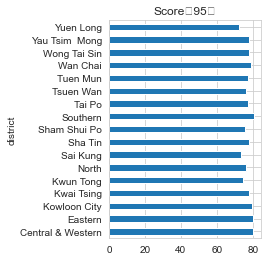

In [207]:
summarized_df5.plot(kind = 'barh', subplots = True, layout = (1, 2), sharex = False, sharey = True, legend = False)
plt.show()
